#### Université de Bordeaux,  Master Mention Informatique

# Analyse, classification et indexation des données : feuille 3
### Régression linéaire simple et multiple

##### Avant de commencer :

Le régression linéaire est l'une des méthodes statistiques les plus utilisées en sciences de données. Elle est utilisée pour <em>prédire</em> les valeurs d'une variable <em>dépendante</em> continue en fonction d'une ou plusieurs variables <em>indépendantes</em>.


In [1]:
import pandas as pa

### Exercice 1. Régression linéaire simple.

La gérante d’un commerce veut évaluer l’impact des frais déboursés en publicité par mois (représentés par une variable $X$ exprimée en milliers d’euros) sur le chiffre d’affaires mensuel (représenté par une variable $Y$ exprimée en milliers d’euros). On aimerait évaluer dans quelle mesure une modification du budget publicitaire mensuel affecterait le chiffre d’affaires mensuel. On a donc recueilli sur une période de 10 mois les données du tableau ci-dessous.

<table>
<tr><td>Chiffre d'affaires</td> <td>220</td> <td>280</td> <td>250</td> <td>170</td> <td>150</td> <td>340</td> <td>310</td> <td>210</td> <td>180</td> <td>190</td></tr>
<tr><td>Frais publicitaires</td> <td>2.6</td> <td>2.6</td> <td>2.4</td> <td>1.5</td> <td>0.9</td> <td>3.0</td> <td>2.7</td> <td>2.3</td> <td>1.7</td> <td>1.9</td></tr>

</table>    

1. Créer un <code>DataFrame</code> contenant les données du tableau ci-dessus.

In [2]:
### CORRECTION
dic ={ 'CA' : [220, 280, 250, 170, 150, 340, 310, 210, 180, 190],
      'Frais' : [2.6, 2.6, 2.4, 1.5, 0.9, 3.0, 2.7, 2.3, 1.7, 1.9]}
df = pa.DataFrame(data=dic)
df.head()

,CA,Frais
0,220,2.6
1,280,2.6
2,250,2.4
3,170,1.5
4,150,0.9


2. Tracer le nuage de points et estimer le coefficient de corrélation linéaire.

Text(0, 0.5, 'CA')

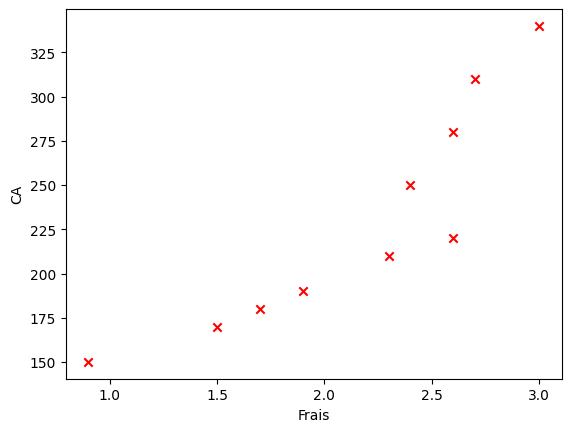

In [3]:
### CORRECTION
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(df['Frais'],df['CA'], color='r', marker='x')
plt.xlabel('Frais')
plt.ylabel('CA')

In [4]:
### CORRECTION
df.corr()
# Les deux variables sont fortement corrélées

,CA,Frais
CA,1.000000,0.893758
Frais,0.893758,1.000000


3. Etablir la droite de régression correspondant à ce problème et tracer cette droite. Vous pouvez utiliser l'instruction <code>linregress</code> du module <code>stats</code>

In [5]:
### CORRECTION
X = df['Frais']
Y = df['CA']

(D) : Yhat =  87.40701381509031  * X +  41.20085015940495


Text(0, 0.5, 'CA')

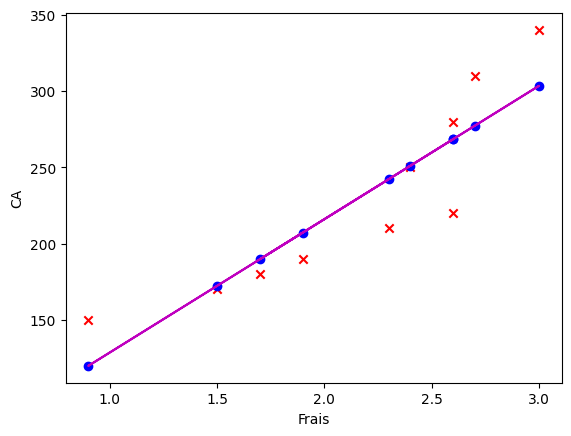

In [6]:
### CORRECTION
from scipy import stats
slope, intercept, r_value, p_value, _ = stats.linregress(X,Y)

Yhat = slope * X + intercept
print('(D) : Yhat = ',slope,' * X + ', intercept )


plt.scatter(X,Y, color='r', marker='x')
plt.scatter(X,Yhat, color='b', marker='o')
plt.plot(X,Yhat,c='m')
plt.xlabel('Frais')
plt.ylabel('CA')

4. Tester la significativité de la régression au risque 5%.

### CORRECTION
Le modèle que l'on cherche s'écrit : 
$$
CA = \beta_0 + \beta_1 Frais
$$
On pose l'hypothèse :

$$
H_0 : \beta_1 = 0
$$

In [7]:
### CORRECTION
print('p_value = ', p_value)

p_value =  0.0004894341749604697


### CORRECTION
On observe que p_value << 5%. 

$\Rightarrow$ On rejette donc $H_0$ au risque $5\%$.

La régression est bien pertinente.

5. Calculer le coefficient de détermination.

In [8]:
### CORRECTION
print('R^2 = ', r_value*r_value)

R^2 =  0.7988029873656866


### CORRECTION
Le facteur de détermination est de 0.8
$\Rightarrow$ 80% de la variation du CA est expliquée par le modèle

6. Quel serait le chiffre d’affaires mensuel prédit par le modèle pour un budget publicitaire mensuel de 400 euros ? de 4000 euros ?

In [9]:
### CORRECTION
def predict(x):
    return slope * x + intercept

print('Le CA mensuel pour un budget publicitaire mensuel de 4OO € serait de : ', predict(0.4), "(milliers d'euros)")
print('Le CA mensuel pour un budget publicitaire mensuel de 4OO0 € serait de : ', predict(4), "(milliers d'euros)")

Le CA mensuel pour un budget publicitaire mensuel de 4OO € serait de :  76.16365568544109 (milliers d'euros)
Le CA mensuel pour un budget publicitaire mensuel de 4OO0 € serait de :  390.8289054197662 (milliers d'euros)


### Exercice 2. Régression linéaire multiple

Nous voulons savoir quels sont les facteurs importants qui influencent la valeur d’une propriété. L'objectif est de construire un modèle qui nous aidera à évaluer cette valeur selon ces facteurs. Pour ce faire, nous utilisons la valeur totale pour un échantillon de 79 propriétés dans une région donnée. Voir le fichier <code>proprietes.csv</code> disponible à l’adresse :

http://www.labri.fr/~zemmari/datasets/proprietes.csv

Le fichier contient les variables suivantes correspondant chacune à un facteur : 
- Valeur Totale : valeur globale de la propriété
- Valeur Terrain : valeur du terrain sur lequel est bâtie la maison
- Acre : Superficie en acres
- Pieds2 : Superficie en pieds2
- Extérieur : Etat extérieur
- Chauffage : Type du chauffage utilisé
- Pièces : Nombre de pièces dans la maison
- Chambres : Nombre de chambres dans la maison
- SbainsC : Nombre de salles de bain complètes
- Sbains : Nombre de salles de bain non complètes
- Foyers : Nombre de foyers
- Garage : Indique si la propriété contient un garage ou non.

Après avoir chargé les données dans un DataFrame vous pouvez visualiser les premières entrées avec la fonction head et inspecter globalement les données avec la fonction info. Y a-t-il des données manquantes?

In [10]:
### CORRECTION
data = pa.read_csv('https://www.labri.fr/~zemmari/datasets/proprietes.csv',delimiter=';')
data.head()

,Valeur Totale,Valeur Terrain,Acre,Pied2,Extérieur,Chauffage,Pièces,Chambre,SbainsC,Sbains,Foyers,Garage
0,199657,63247,"1,63",1726,Good,NatGas,8,4,2,1,2,Garage
1,78482,38091,"0,495",1184,Good,NatGas,6,2,1,0,0,NoGarage
2,119962,37665,"0,375",1014,Good,Electric,7,3,2,0,1,Garage
3,116492,54062,"0,981",1260,Average,Electric,6,3,2,0,1,Garage
4,131263,61546,"1,14",1314,Average,NatGas,8,4,2,1,2,NoGarage


In [11]:
### CORRECTION
data.info()
# pas de données manquantes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Valeur Totale   79 non-null     int64 
 1   Valeur Terrain  79 non-null     int64 
 2   Acre            79 non-null     object
 3   Pied2           79 non-null     int64 
 4   Extérieur       79 non-null     object
 5   Chauffage       79 non-null     object
 6   Pièces          79 non-null     int64 
 7   Chambre         79 non-null     int64 
 8   SbainsC         79 non-null     int64 
 9   Sbains          79 non-null     int64 
 10  Foyers          79 non-null     int64 
 11  Garage          79 non-null     object
dtypes: int64(8), object(4)
memory usage: 7.5+ KB


1. Y a-t-il un lien entre la valeur totale et les différents facteurs ?

In [12]:
### CORRECTION
data = data.drop(columns=['Acre', 'Extérieur', 'Chauffage', 'Garage'])
data.corr()

,Valeur Totale,Valeur Terrain,Pied2,Pièces,Chambre,SbainsC,Sbains,Foyers
Valeur Totale,1.000000,0.814685,0.766510,0.626500,0.582365,0.626234,0.435950,0.547980
Valeur Terrain,0.814685,1.000000,0.515980,0.517940,0.497388,0.505859,0.235842,0.496970
Pied2,0.766510,0.515980,1.000000,0.562823,0.431150,0.457476,0.353999,0.364592
Pièces,0.626500,0.517940,0.562823,1.000000,0.790934,0.479091,0.488519,0.394377
Chambre,0.582365,0.497388,0.431150,0.790934,1.000000,0.585968,0.166039,0.399628
SbainsC,0.626234,0.505859,0.457476,0.479091,0.585968,1.000000,0.171758,0.485582
Sbains,0.435950,0.235842,0.353999,0.488519,0.166039,0.171758,1.000000,0.385958
Foyers,0.547980,0.496970,0.364592,0.394377,0.399628,0.485582,0.385958,1.000000


### CORRECTION
Seule la première ligne de la matrice ci-dessus est intéressante pour nous. 

On y voit que la valeur totale est corrélée avec toutes les autres variables. En effet, tous les facteurs se corrélation sont > 0.5 (sauf Sbains)

2. Afficher les valeurs des différentes statistiques desciptives.

In [13]:
### CORRECTION
data.describe()

,Valeur Totale,Valeur Terrain,Pied2,Pièces,Chambre,SbainsC,Sbains,Foyers
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,187253.405063,65899.481013,1677.911392,8.518987,3.987342,2.240506,0.721519,1.974684
std,84401.421337,22986.951385,634.638847,2.401179,1.265860,1.283177,0.714981,1.367898
min,74365.000000,35353.000000,672.000000,5.000000,2.000000,1.000000,0.000000,0.000000
25%,123089.000000,48002.000000,1147.000000,7.000000,3.000000,1.000000,0.000000,1.000000
50%,156761.000000,59861.000000,1628.000000,8.000000,4.000000,2.000000,1.000000,2.000000
75%,235277.500000,77868.000000,2022.000000,10.000000,5.000000,3.000000,1.000000,2.500000
max,453744.000000,131224.000000,3501.000000,18.000000,8.000000,7.000000,3.000000,7.000000


3. Faites les différentes régressions linéaires simples possibles, et choisissez la (ou les) plus pertinente(s).

In [14]:
### CORRECTION
Y = data['Valeur Totale']
columns = ['Valeur Terrain','Pied2','Pièces','Chambre','SbainsC','Sbains','Foyers']

In [15]:
### CORRECTION
from scipy import stats
for j in range(len(columns)):
    slope, intercept, r_value, p_value, _ = stats.linregress(data[columns[j]],Y)
    r_value *= r_value
    print('Modèle ', j+1)
    print('------- Valeur Totale = ', intercept, ' + ', slope, ' * ', columns[j])
    print('------- R^2 = ', r_value)
    print('        Donc {:2.2f}% de la variabilité de la valeur totale est expliquée par {:s}'.format(
        r_value *100,columns[j]))
    print('------- p_value = ', p_value)   
    print('        H0: beta_1 = 0')
    if p_value < 0.05 :
        print('        ', p_value, '<= 5%', '==> on rejette H0, au risque alpha = 5%')
        print('         le modèle ', j+1, ' est bien pertinent.')
    else:
        print('        ', p_value, '> 5%', '==> on ne rejette pas H0, au risque alpha = 5%')
        print('         on ne peut pas conclure sur le modèle ', j+1, ' car pas statistiquement significatif.')        

Modèle  1
------- Valeur Totale =  -9870.846451247635  +  2.9912868581874625  *  Valeur Terrain
------- R^2 =  0.6637115265551455
        Donc 66.37% de la variabilité de la valeur totale est expliquée par Valeur Terrain
------- p_value =  6.636865062557978e-20
        H0: beta_1 = 0
         6.636865062557978e-20 <= 5% ==> on rejette H0, au risque alpha = 5%
         le modèle  1  est bien pertinent.
Modèle  2
------- Valeur Totale =  16208.538146922976  +  101.939153456249  *  Pied2
------- R^2 =  0.5875378229047032
        Donc 58.75% de la variabilité de la valeur totale est expliquée par Pied2
------- p_value =  1.8250569973875542e-16
        H0: beta_1 = 0
         1.8250569973875542e-16 <= 5% ==> on rejette H0, au risque alpha = 5%
         le modèle  2  est bien pertinent.
Modèle  3
------- Valeur Totale =  -347.1329936950351  +  22021.459890790356  *  Pièces
------- R^2 =  0.39250189604893293
        Donc 39.25% de la variabilité de la valeur totale est expliquée par Pièces
--

### CORRECTION
Si on doit choisir un modèle et un seul, le meilleur est le modèle 1.

4. Faites la régression multiple de la Valeur totale en fonction des autres facteurs (quand c’est possible). Analysez les résultats obtenus.  Appuyez vous sur l'exemple vu en cours pour la méthode à suivre et l'utilisation de bibliothèques.

In [16]:
### CORRECTION
Y = data['Valeur Totale']
X = data[columns]

In [17]:
### CORRECTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, Y)
print(model.intercept_)
print(model.coef_)

-57009.08941780857
[ 1.77261832e+00  5.17288482e+01 -5.13570089e+03  1.16684396e+04
  8.59826844e+03  2.34912143e+04  8.41920181e+02]


In [18]:
### CORRECTION
print('Modèle de régression : ')
m = 'Valeur Totale = ' + str(model.intercept_) + ' + '
for i in range(len(model.coef_)-1):
    m =  m + str(model.coef_[i]) + ' * ' + columns[i] + ' + '
m = m + str(model.coef_[i+1]) + ' * ' + columns[i+1]
print(m)

Modèle de régression : 
Valeur Totale = -57009.08941780857 + 1.7726183178894601 * Valeur Terrain + 51.72884818587481 * Pied2 + -5135.70089331107 * Pièces + 11668.439578336613 * Chambre + 8598.26844361184 * SbainsC + 23491.214326444177 * Sbains + 841.9201808375745 * Foyers


In [19]:
### CORRECTION
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import statsmodels
from statsmodels.regression.linear_model import OLS

X= statsmodels.tools.add_constant(X)
m = OLS(Y,X)
results = m.fit()
su = results.summary()
su

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Valeur Totale   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     72.95
Date:                Tue, 09 Dec 2025   Prob (F-statistic):           6.98e-30
Time:                        11:47:24   Log-Likelihood:                -924.64
No. Observations:                  79   AIC:                             1865.
Df Residuals:                      71   BIC:                             1884.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -5.701e+04   1.41e+04     -4.030      0.000   -8.52e+04   -2.88e+04
Valeur Terrain     1.7726      0.205      8.667      0.000       1.365       2.180
Pied2             51.7288      7.253      7.132      0.000      37.267      66.191
Pièces         -5135.7009   3144.245     -1.633      0.107   -1.14e+04    1133.746
Chambre         1.167e+04   5484.263      2.128      0.037     733.131    2.26e+04
SbainsC         8598.2684   3735.359      2.302      0.024    1150.174     1.6e+04
Sbains          2.349e+04   6586.034      3.567      0.001    1.04e+04    3.66e+04
Foyers           841.9202   3312.750      0.254      0.800   -5763.516    7447.356
==============================================================================
Omnibus:                        1.145   Durbin-Watson:                   1.695
Prob(Omnibus):                  0.564   Jarque-Bera (JB):                0.575
Skew:                           0.011   Prob(JB):                        0.750
Kurtosis:                       3.417   Cond. No.                     2.86e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.86e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### CORRECTION
#### Analyse de la régression :

$R^2 = 0.878$ $\Rightarrow$ 88% de la variabilité de Valeur Totale est expliquée par les variables considérées.

On pose :
$$
H_0 : \beta_1 = \beta_2 = \beta_3 = \beta_4 = \beta_5 = \beta_6 = \beta_7 = 0, 
$$
où $\beta_1, \beta_2, \beta_3, \beta_4, \beta_5, \beta_6, \beta_7$ correspondent aux coefficients de Valeur Terrain, Pied2, Pièces, Chambre, SbainsC, Sbains , et Foyers respectivement.

On observe que p_value = 6.98e-30, ce qui est très petit comparé au seuil $\alpha = 5\%$. On rejette donc $H_0$ et on considère que la variation de Valeur Totale est explicable par au moins une des autres variables.

Pour chacune des variables, on pose l'hypothèse : 
$$
H_0 : \beta_i = 0, 
$$
On analyse la deuxième partie du rapport de la régression. On voit que toutes les p_value, exceptées celles de Pieces et de Foyers sont < au seuil $5%%$. On rejette donc toutes les hypothèses sauf celles concernant ces deux  variables. 

On refait la régression en éliminant les deux variables Pieces et Foyers.

In [20]:
### CORRECTION
X.columns

Index(['const', 'Valeur Terrain', 'Pied2', 'Pièces', 'Chambre', 'SbainsC',
       'Sbains', 'Foyers'],
      dtype='object')

In [21]:
### CORRECTION
X_cols = X.columns.drop(['Pièces', 'Foyers'])
print(X_cols)
X = X[X_cols]
m = OLS(Y,X)
results = m.fit()
su = results.summary()
su

Index(['const', 'Valeur Terrain', 'Pied2', 'Chambre', 'SbainsC', 'Sbains'], dtype='object')


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Valeur Totale   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     100.3
Date:                Tue, 09 Dec 2025   Prob (F-statistic):           2.84e-31
Time:                        11:47:24   Log-Likelihood:                -926.23
No. Observations:                  79   AIC:                             1864.
Df Residuals:                      73   BIC:                             1879.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -6.48e+04   1.35e+04     -4.812      0.000   -9.16e+04    -3.8e+04
Valeur Terrain     1.7543      0.197      8.919      0.000       1.362       2.146
Pied2             48.5526      7.044      6.892      0.000      34.513      62.592
Chambre         5038.9690   3617.104      1.393      0.168   -2169.908    1.22e+04
SbainsC         9628.3045   3618.663      2.661      0.010    2416.319    1.68e+04
Sbains          1.846e+04   5278.154      3.496      0.001    7935.654     2.9e+04
==============================================================================
Omnibus:                        2.085   Durbin-Watson:                   1.638
Prob(Omnibus):                  0.353   Jarque-Bera (JB):                1.574
Skew:                          -0.019   Prob(JB):                        0.455
Kurtosis:                       3.690   Cond. No.                     2.72e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.72e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### CORRECTION
La p-value de la variable Chambre est supérieur à 0.05 donc on recommence en supprimant cette variable.

In [22]:
### CORRECTION
X_cols = X.columns.drop(['Chambre'])
print(X_cols)
X = X[X_cols]
m = OLS(Y,X)
results = m.fit()
su = results.summary()
su

Index(['const', 'Valeur Terrain', 'Pied2', 'SbainsC', 'Sbains'], dtype='object')


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Valeur Totale   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     123.3
Date:                Tue, 09 Dec 2025   Prob (F-statistic):           6.19e-32
Time:                        11:47:24   Log-Likelihood:                -927.26
No. Observations:                  79   AIC:                             1865.
Df Residuals:                      74   BIC:                             1876.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -5.553e+04   1.18e+04     -4.713      0.000    -7.9e+04   -3.21e+04
Valeur Terrain     1.8159      0.193      9.415      0.000       1.432       2.200
Pied2             49.8327      7.028      7.090      0.000      35.828      63.837
SbainsC          1.17e+04   3321.234      3.522      0.001    5078.111    1.83e+04
Sbains          1.843e+04   5311.566      3.470      0.001    7846.248     2.9e+04
==============================================================================
Omnibus:                        5.111   Durbin-Watson:                   1.692
Prob(Omnibus):                  0.078   Jarque-Bera (JB):                5.998
Skew:                          -0.237   Prob(JB):                       0.0498
Kurtosis:                       4.264   Cond. No.                     2.33e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.33e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### CORRECTION
Toutes les variables ont une p-value < 5% donc on garde ce modèle.